### Matrix Shape 정리
$ X == (N,D) $  
$ W_1 == (D,H) $  
$ b_1 == (H,) $  
$ H == (N,H) $  
$ A == (N,H) $  
$ W_2 == (H,C) $  
$ b_2 == (C,) $  
$ S == (N,C) $  
$ P == (N,C) $  

### Matrix 미분 정리  
$ H = XW + b\qquad  (N, H) = (N, D) \times (D, H) + (H,) $  
$ L = f(H) $  
$ {\partial L \over \partial W} = X^T {\partial L \over \partial H} = {\partial H \over \partial W} \times {\partial L \over \partial H}$  
$ {\partial L \over \partial X} = {\partial L \over \partial H} W^T = {\partial L \over \partial H} \times {\partial H \over \partial X}$  
$ {\partial L \over \partial b} = 1*{\partial L \over \partial H}  $  

### 2 Layers Chain Rule 정리  
##### Forward
$ H = XW_1 + b_1$  
$ A = ReLU(H) $  
$ S = AW_2 + b_2 $  
$ P = Softmax(S) $    
$ L = -LogLikelihood(P) $  
##### Backward  
$ {\partial L \over \partial S} = P-T $ : T는 Label  
$ {\partial L \over \partial W_2} = {\partial S \over \partial W_2}{\partial L \over \partial S} = A^T(P-T) $  
$ {\partial L \over \partial b_2} = 1 * {\partial L \over \partial S} = P-T $  
$ {\partial L \over \partial A} = {\partial L \over \partial S}{\partial S \over \partial A} = (P-T)W_2 $  

$ {\partial L \over \partial H} = {\partial A \over \partial H} * {\partial L \over \partial A} $  
$ {\partial L \over \partial W_1} = {\partial H \over \partial W_1}{\partial L \over \partial H} = X {\partial L \over \partial H}  $  
$ {\partial L \over \partial b_1} = {\partial L \over \partial H} $  

### Softmax - Cross Entropy Error미분  
<img src="img/fig a-5.png">

### 데이터 Load  
cifar-10 데이터를 불러옵니다.  
프레임워크 내 자체적으로 데이터를 로드할 수 있지만, 
이렇게도 데이터 로드가 가능합니다!  
32  32  3 차원의 데이터를 3072 차원으로 바뀌는 것 까지 드릴게요.

In [1]:
from load_cifar_10 import *
import numpy as np
from Model import TwoLayerNet

In [2]:
cifar_10_dir = 'cifar-10-batches-py'

train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
load_cifar_10_data(cifar_10_dir)

def Processing_data(train, test):
    #change dtype
    train = np.array(train, dtype=np.float64)
    test = np.array(test, dtype=np.float64)
    
    #Reshaping
    train = np.reshape(train, (train.shape[0], -1))
    test = np.reshape(test, (test.shape[0], -1))
    
    #Normalizing
    mean_image = np.mean(train, axis = 0)
    #print(train.dtype)
    train -= mean_image
    test -= mean_image
    
    return train, test

In [3]:
train_data, test_data = Processing_data(train_data, test_data)

In [4]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


너무 많으니까 5000개, 1000개만 사용합시다!

In [5]:
train_data = train_data[:5000]
train_labels = train_labels[:5000]
test_data = test_data[:1000]
test_labels = test_labels[:1000]

### 데이터 확인  
실제 데이터가 어떻게 생겼는지는 한번 확인해보세요!

In [6]:
train_data

array([[ -71.71074,  -74.05614,  -69.5538 , ...,   -3.63908,  -33.8503 ,
         -42.38186],
       [  23.28926,   40.94386,   54.4462 , ...,   16.36092,    7.1497 ,
          29.61814],
       [ 124.28926,  118.94386,  122.4462 , ...,  -46.63908,  -39.8503 ,
         -30.38186],
       ...,
       [  36.28926,   26.94386,   12.4462 , ...,  -84.63908,  -47.8503 ,
         -30.38186],
       [  23.28926,   15.94386,   -7.5538 , ...,   67.36092,  121.1497 ,
          -0.38186],
       [ -85.71074, -104.05614, -111.5538 , ...,   29.36092,   16.1497 ,
         -14.38186]])

### 하이퍼파라미터 설정  
하이퍼파라미터를 설정하겠습니다.  
hidden_size, epoch_size, batch_size, learning_rate 등은 전부 하이퍼 파라미터이니 바꿔서 해보세요.

In [7]:
import pandas as pd
from Model import *

In [8]:
input_size = 32 * 32 * 3
output_size = 10
N = train_data.shape[0]

hidden_sizes = [30,50,70]
epoch_sizes = [20,50,70]
batch_sizes = [10,50,70,100]
learning_rates =[0.0001,0.0005,0.001]


In [9]:
from itertools import product
items = [hidden_sizes,epoch_sizes,batch_sizes,learning_rates]
params=list(product(*items))

### 모델 만들기  
input_size, hidden_size, output_size는 데이터에 맞게 잘 설정해주세요.  
Model.py를 완성시켜주세요.

In [10]:
scores=[]
for param in params:
    hidden_size,epoch_size,batch_size,learning_rate=param
    nn = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
    
    history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!
    for i in range(epoch_size):
        for j in range(N//batch_size):
            batch_mask = np.random.choice(N, batch_size)
            x_batch = train_data[batch_mask]
            t_batch = train_labels[batch_mask]
            nn.backward(x_batch, t_batch) # 가중치 갱신
        history["val_acc"].append(nn.accuracy(test_data, test_labels))
        history["val_loss"].append(nn.forward(test_data, test_labels))
    min_loss = min(pd.Series(history['val_loss']))
    scores.append([param,min_loss])
    
    #if i % 10 == 0:
    #    print(i, "test accuracy :", nn.accuracy(test_data, test_labels))
    #    print(i, "test loss     :", nn.forward(test_data, test_labels))

In [17]:
for i in scores

[[(30, 20, 10, 0.0001), -2.302458058671149],
 [(30, 20, 10, 0.0005), -2.3024732639213488],
 [(30, 20, 10, 0.001), -2.302470754174422],
 [(30, 20, 50, 0.0001), -2.3025740737285965],
 [(30, 20, 50, 0.0005), -2.302569914295045],
 [(30, 20, 50, 0.001), -2.3025598534342135],
 [(30, 20, 70, 0.0001), -2.3025801281756557],
 [(30, 20, 70, 0.0005), -2.30257983007194],
 [(30, 20, 70, 0.001), -2.302562886132621],
 [(30, 20, 100, 0.0001), -2.3025759242079946],
 [(30, 20, 100, 0.0005), -2.3025694414858764],
 [(30, 20, 100, 0.001), -2.3025842926657853],
 [(30, 50, 10, 0.0001), -2.3024390683724816],
 [(30, 50, 10, 0.0005), -2.3024864714935562],
 [(30, 50, 10, 0.001), -2.302535340642036],
 [(30, 50, 50, 0.0001), -2.3025621173701447],
 [(30, 50, 50, 0.0005), -2.302565780740282],
 [(30, 50, 50, 0.001), -2.3025774493481017],
 [(30, 50, 70, 0.0001), -2.3025764274348854],
 [(30, 50, 70, 0.0005), -2.3025536060479297],
 [(30, 50, 70, 0.001), -2.302564066844525],
 [(30, 50, 100, 0.0001), -2.3025609961095297],


### 그림 그리기

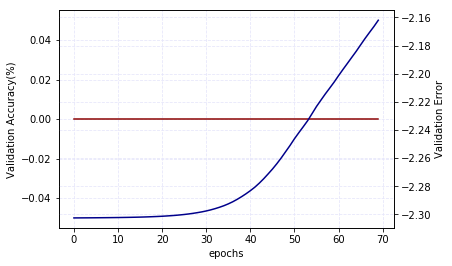

In [11]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()